In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics import confusion_matrix

C:\Users\Pankaj Raut\harsha\anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df =pd.read_csv("OmanDataSet.csv")

In [3]:
df.head()

,year,timhour,timperiod,day,month,acctyp,roadtyp,location,climate,cause,...,vhcltyp,heavyVcl,insurtyp,harmlvl,vhcls,singlmltipl,prsns,death_wound,wounds,deaths
0,2011,1800,4,4,8,1,1,1,1,1,...,6,2,2,2,1,1,2,2,2,0
1,2009,1300,3,3,12,1,2,1,1,1,...,6,2,2,3,1,1,3,2,2,0
2,2011,100,1,1,2,3,1,6,1,1,...,6,2,2,1,1,1,2,2,2,0
3,2009,1000,2,3,2,1,1,6,1,1,...,6,2,2,1,1,1,2,2,2,0
4,2011,2300,4,7,5,1,2,4,1,1,...,6,2,2,2,1,1,1,2,1,0


In [4]:
df.replace(' ', np.nan, inplace=True)
df.isna().sum()

year            1
timhour         0
timperiod       0
day             0
month           5
acctyp          0
roadtyp         0
location       64
climate         0
cause          32
gender          6
national        0
age            11
licns           0
injLvl          5
vhcltyp         0
heavyVcl        0
insurtyp        0
harmlvl         0
vhcls           0
singlmltipl     0
prsns           0
death_wound     0
wounds          1
deaths          5
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isna().sum()
df['month'].value_counts()

3     2743
1     2506
2     2108
4     2086
7     1947
5     1914
10    1887
8     1847
12    1844
6     1831
9     1743
11    1613
Name: month, dtype: int64

In [7]:
df.head()

,year,timhour,timperiod,day,month,acctyp,roadtyp,location,climate,cause,...,vhcltyp,heavyVcl,insurtyp,harmlvl,vhcls,singlmltipl,prsns,death_wound,wounds,deaths
0,2011,1800,4,4,8,1,1,1,1,1,...,6,2,2,2,1,1,2,2,2,0
1,2009,1300,3,3,12,1,2,1,1,1,...,6,2,2,3,1,1,3,2,2,0
2,2011,100,1,1,2,3,1,6,1,1,...,6,2,2,1,1,1,2,2,2,0
3,2009,1000,2,3,2,1,1,6,1,1,...,6,2,2,1,1,1,2,2,2,0
4,2011,2300,4,7,5,1,2,4,1,1,...,6,2,2,2,1,1,1,2,1,0


In [8]:
df=df.drop(['death_wound'],axis=1)
df=df.drop(['timhour'],axis=1)
df=df.drop(['age'],axis=1)

In [9]:
df.head()

,year,timperiod,day,month,acctyp,roadtyp,location,climate,cause,gender,...,injLvl,vhcltyp,heavyVcl,insurtyp,harmlvl,vhcls,singlmltipl,prsns,wounds,deaths
0,2011,4,4,8,1,1,1,1,1,1,...,5,6,2,2,2,1,1,2,2,0
1,2009,3,3,12,1,2,1,1,1,2,...,5,6,2,2,3,1,1,3,2,0
2,2011,1,1,2,3,1,6,1,1,1,...,5,6,2,2,1,1,1,2,2,0
3,2009,2,3,2,1,1,6,1,1,1,...,3,6,2,2,1,1,1,2,2,0
4,2011,4,7,5,1,2,4,1,1,1,...,2,6,2,2,2,1,1,1,1,0


In [10]:
#code for changing object to interger
df['cause'] = df['cause'].astype(str).astype(int)
df['injLvl'] = df['injLvl'].astype(str).astype(int)
df['wounds'] = df['wounds'].astype(str).astype(int)
df['deaths'] = df['deaths'].astype(str).astype(int)
df['location'] = df['location'].astype(str).astype(int)
df['gender'] = df['gender'].astype(str).astype(int)

In [11]:
df.dtypes

year           object
timperiod       int64
day             int64
month          object
acctyp          int64
roadtyp         int64
location        int32
climate         int64
cause           int32
gender          int32
national        int64
licns           int64
injLvl          int32
vhcltyp         int64
heavyVcl        int64
insurtyp        int64
harmlvl         int64
vhcls           int64
singlmltipl     int64
prsns           int64
wounds          int32
deaths          int32
dtype: object

In [12]:
df['deaths']= df['deaths'].apply(lambda x: 0 if x== 0 else 1)

In [13]:
df['deaths'].value_counts()

0    21584
1     2485
Name: deaths, dtype: int64

In [14]:
#Converting charater column to integer
from sklearn.preprocessing import LabelEncoder
# convert a string variable to a categorical one
df[["year"]] = df[["year"]].apply(LabelEncoder().fit_transform)
df[["gender"]] = df[["gender"]].apply(LabelEncoder().fit_transform)
df[["timperiod"]] = df[["timperiod"]].apply(LabelEncoder().fit_transform)
df[["day"]] = df[["day"]].apply(LabelEncoder().fit_transform)
df[["wounds"]] = df[["wounds"]].apply(LabelEncoder().fit_transform)
df[["deaths"]] = df[["deaths"]].apply(LabelEncoder().fit_transform)
df[["location"]] = df[["location"]].apply(LabelEncoder().fit_transform)
df[["injLvl"]] = df[["injLvl"]].apply(LabelEncoder().fit_transform)
df[["cause"]] = df[["cause"]].apply(LabelEncoder().fit_transform)

In [15]:
df.head()

,year,timperiod,day,month,acctyp,roadtyp,location,climate,cause,gender,...,injLvl,vhcltyp,heavyVcl,insurtyp,harmlvl,vhcls,singlmltipl,prsns,wounds,deaths
0,2,3,3,8,1,1,0,1,0,0,...,4,6,2,2,2,1,1,2,2,0
1,0,2,2,12,1,2,0,1,0,1,...,4,6,2,2,3,1,1,3,2,0
2,2,0,0,2,3,1,5,1,0,0,...,4,6,2,2,1,1,1,2,2,0
3,0,1,2,2,1,1,5,1,0,0,...,2,6,2,2,1,1,1,2,2,0
4,2,3,6,5,1,2,3,1,0,0,...,1,6,2,2,2,1,1,1,1,0


In [16]:
df.dtypes


year            int32
timperiod       int64
day             int64
month          object
acctyp          int64
roadtyp         int64
location        int64
climate         int64
cause           int64
gender          int64
national        int64
licns           int64
injLvl          int64
vhcltyp         int64
heavyVcl        int64
insurtyp        int64
harmlvl         int64
vhcls           int64
singlmltipl     int64
prsns           int64
wounds          int64
deaths          int64
dtype: object

In [17]:
#Checking imbalance of data with help of Z-score

from statistics import *

clas_mean= df['deaths'].mean()
clas_std = df['deaths'].std()
df['z-score'] = (df['deaths']-clas_mean)/clas_std
values_plus_minus_one_z_score = len(df[df['z-score'].between(-1, 1)==True])
percent_values_plus_minus_one_z_score = values_plus_minus_one_z_score/len(df)*100
percent_values_plus_minus_one_z_score

89.67551622418878

In [18]:
df.head()

,year,timperiod,day,month,acctyp,roadtyp,location,climate,cause,gender,...,vhcltyp,heavyVcl,insurtyp,harmlvl,vhcls,singlmltipl,prsns,wounds,deaths,z-score
0,2,3,3,8,1,1,0,1,0,0,...,6,2,2,2,1,1,2,2,0,-0.339303
1,0,2,2,12,1,2,0,1,0,1,...,6,2,2,3,1,1,3,2,0,-0.339303
2,2,0,0,2,3,1,5,1,0,0,...,6,2,2,1,1,1,2,2,0,-0.339303
3,0,1,2,2,1,1,5,1,0,0,...,6,2,2,1,1,1,2,2,0,-0.339303
4,2,3,6,5,1,2,3,1,0,0,...,6,2,2,2,1,1,1,1,0,-0.339303


In [19]:
#Other way of Checking imbalance of data
target_count=df.deaths.value_counts()
print(target_count)

imbalance_target=(target_count[0]/(target_count[1]+target_count[0]))*100
print(imbalance_target)

0    21584
1     2485
Name: deaths, dtype: int64
89.67551622418878


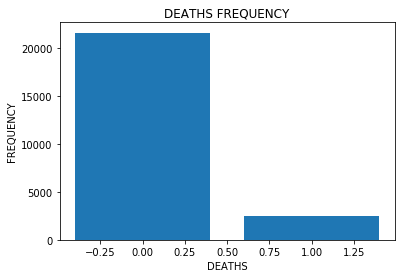

In [20]:
import numpy as np
import matplotlib.pyplot as plt

classes = df['deaths'].values
unique, counts = np.unique(classes, return_counts=True)


plt.bar(unique,counts)
plt.title('DEATHS FREQUENCY')
plt.xlabel('DEATHS')
plt.ylabel('FREQUENCY')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000012745E35C8>,
      dtype=object)

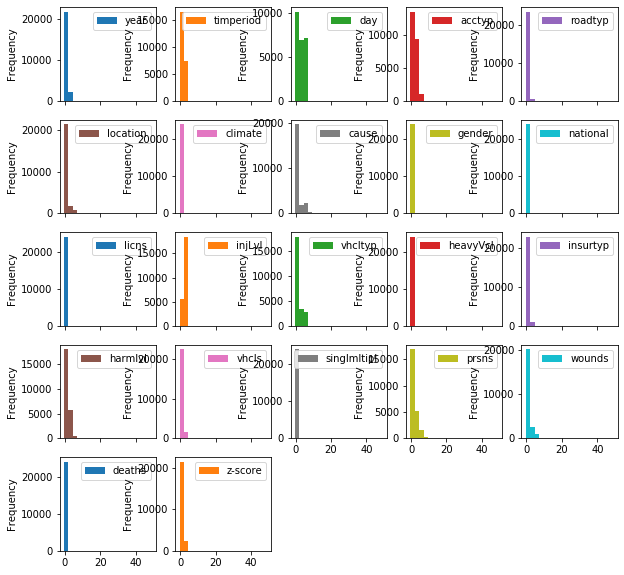

In [21]:
df.plot.hist(subplots=True, layout=(5,5), figsize=(10, 10), bins=20)

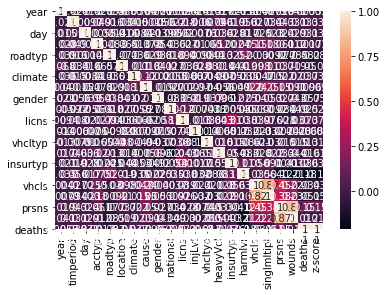

In [22]:
sns.heatmap(df.corr(), annot=True)

In [23]:
df.columns

Index(['year', 'timperiod', 'day', 'month', 'acctyp', 'roadtyp', 'location',
       'climate', 'cause', 'gender', 'national', 'licns', 'injLvl', 'vhcltyp',
       'heavyVcl', 'insurtyp', 'harmlvl', 'vhcls', 'singlmltipl', 'prsns',
       'wounds', 'deaths', 'z-score'],
      dtype='object')

In [24]:
X=df.iloc[:,1:len(df.columns)-2]
y=df.iloc[:,len(df.columns)-2:len(df.columns)-1]
df

,year,timperiod,day,month,acctyp,roadtyp,location,climate,cause,gender,...,vhcltyp,heavyVcl,insurtyp,harmlvl,vhcls,singlmltipl,prsns,wounds,deaths,z-score
0,2,3,3,8,1,1,0,1,0,0,...,6,2,2,2,1,1,2,2,0,-0.339303
1,0,2,2,12,1,2,0,1,0,1,...,6,2,2,3,1,1,3,2,0,-0.339303
2,2,0,0,2,3,1,5,1,0,0,...,6,2,2,1,1,1,2,2,0,-0.339303
3,0,1,2,2,1,1,5,1,0,0,...,6,2,2,1,1,1,2,2,0,-0.339303
4,2,3,6,5,1,2,3,1,0,0,...,6,2,2,2,1,1,1,1,0,-0.339303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24164,1,1,0,3,3,1,0,1,0,1,...,1,2,1,3,1,1,1,0,0,-0.339303
24165,0,3,0,10,4,1,0,1,0,1,...,1,2,2,3,1,1,1,0,0,-0.339303
24166,0,3,1,6,4,1,0,1,0,1,...,1,2,2,2,4,2,1,1,0,-0.339303
24167,0,2,6,6,4,1,0,1,0,1,...,1,2,1,3,1,1,1,0,0,-0.339303


-- 10-fold cross-validation 
All DT scores: 
{'fit_time': array([0.01502824, 0.01400685, 0.01601195, 0.01501107, 0.01401067,
       0.01400709, 0.01401162, 0.01801014, 0.01701117, 0.01400805]), 'score_time': array([0.00198507, 0.00200057, 0.00200152, 0.00100088, 0.00200176,
       0.00200224, 0.00200248, 0.00200248, 0.00300169, 0.00100112]), 'test_score': array([0.90041494, 0.91701245, 0.9253112 , 0.91078838, 0.91268191,
       0.92931393, 0.89189189, 0.92099792, 0.92307692, 0.91891892])}
Accuracy mean is: 0.9150408467835854
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4309
           1       0.99      0.21      0.35       505

    accuracy                           0.92      4814
   macro avg       0.95      0.61      0.65      4814
weighted avg       0.92      0.92      0.89      4814



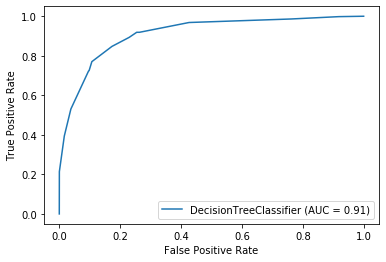

In [25]:
#Cross validation on dataset using decision tree
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report


# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("-- 10-fold cross-validation ")

#Defining Decision Tree
dt_clf = DecisionTreeClassifier(criterion="gini", random_state=10, max_depth=4, min_samples_leaf=4)

#Training Decision Tree
dt_clf.fit(X_train, y_train)

#Cross Validating using Decision Tree
old_dt_scores =cross_validate(dt_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=dt_clf.predict(X_test)
#Result
print("All DT scores: ")
print(old_dt_scores)
print("Accuracy mean is:", old_dt_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(dt_clf, X_test, y_test.values.ravel())
plt.show() 

C:\Users\Pankaj Raut\harsha\anaconda\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


All RF scores: 
{'fit_time': array([0.32623339, 0.3162241 , 0.22517872, 0.21515155, 0.21315026,
       0.21012831, 0.21116877, 0.23718667, 0.22616005, 0.22113776]), 'score_time': array([0.02101374, 0.01901364, 0.01501155, 0.01501155, 0.01401019,
       0.01401162, 0.01399064, 0.01501107, 0.0150106 , 0.01501083]), 'test_score': array([0.89419087, 0.89419087, 0.89419087, 0.89419087, 0.8960499 ,
       0.8960499 , 0.8960499 , 0.8960499 , 0.8960499 , 0.89397089])}
Accuracy mean is: 0.8950983859697551
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      4309
           1       0.00      0.00      0.00       505

    accuracy                           0.90      4814
   macro avg       0.45      0.50      0.47      4814
weighted avg       0.80      0.90      0.85      4814



C:\Users\Pankaj Raut\harsha\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


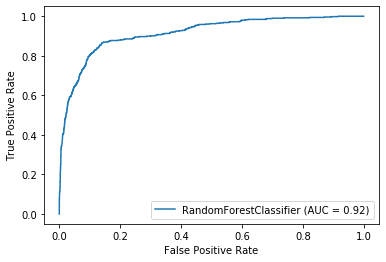

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve


#Defining Random Forest Classifier
rf_clf = RandomForestClassifier(criterion="gini", random_state=10, max_depth=4, min_samples_leaf=4)

#Training Random Forest Classifier
rf_clf.fit(X_train, y_train)

#Cross Validating Random Forest
old_rf_scores =cross_validate(rf_clf, X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=rf_clf.predict(X_test)
#Result
print("All RF scores: ")
print(old_rf_scores)

print("Accuracy mean is:", old_rf_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))
plot_roc_curve(rf_clf, X_test, y_test.values.ravel())
plt.show() 


In [28]:
#Partition the datasets into 10 bins keeping the imbalance ratio from the original datasets
from sklearn.preprocessing import StandardScaler

#Separating o and 1 classes data
df_class0=df[df['deaths']==0]
df_class1=df[df['deaths']==1]

#Countig length of each class data

ln0=int(len(df_class0)/10)
ln1=int(len(df_class1)/10)

init0=0
init1=0

bins=[]

#original Imbalance
orig_imbalance=(target_count[0]/(target_count[1]+target_count[0]))*100
print("Original Imbalance in the dataset: {} %".format(orig_imbalance))

#Creating 10 bins keeping imbalance percentage as original
for i in range(10):
    curr_bin=pd.concat([df_class0.iloc[init0:init0+ln0,:],df_class1.iloc[init1:init1+ln1,:]])
    target_cnt=curr_bin.deaths.value_counts()
    imbalance=(target_cnt[0]/(target_cnt[0]+target_cnt[1]))*100
    print("Class imbalance ratio in bin {} : {} %".format(i,imbalance))
    bins.append(curr_bin.values)
    init0+=ln0
    init1+=ln1


# Preprocessing 9 Bins data as X_train and curr_bin as X_test
bin9=np.vstack((bins[j] for j in range(10) if j!=i )) #combining 9 bins data
data=pd.DataFrame(bin9)
data.columns=df.columns

X_train=data.iloc[:,1:19]
y_train=data.iloc[:,19:21]
X_test=curr_bin.iloc[:,1:19]
y_test=curr_bin.iloc[:,19:21]

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

Original Imbalance in the dataset: 89.67551622418878 %
Class imbalance ratio in bin 0 : 89.69243557772236 %
Class imbalance ratio in bin 1 : 89.69243557772236 %
Class imbalance ratio in bin 2 : 89.69243557772236 %
Class imbalance ratio in bin 3 : 89.69243557772236 %
Class imbalance ratio in bin 4 : 89.69243557772236 %
Class imbalance ratio in bin 5 : 89.69243557772236 %
Class imbalance ratio in bin 6 : 89.69243557772236 %
Class imbalance ratio in bin 7 : 89.69243557772236 %
Class imbalance ratio in bin 8 : 89.69243557772236 %
Class imbalance ratio in bin 9 : 89.69243557772236 %


C:\Users\Pankaj Raut\harsha\anaconda\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


silhouette 2th score:0.535893 
Distortion or average SSE for 2th cluster is:0.995594 
silhouette 3th score:0.586935 
Distortion or average SSE for 3th cluster is:0.839847 
silhouette 4th score:0.469157 
Distortion or average SSE for 4th cluster is:0.734478 
silhouette 5th score:0.391147 
Distortion or average SSE for 5th cluster is:0.653181 
silhouette 6th score:0.376066 
Distortion or average SSE for 6th cluster is:0.605037 
silhouette 7th score:0.375986 
Distortion or average SSE for 7th cluster is:0.569603 
silhouette 8th score:0.377895 
Distortion or average SSE for 8th cluster is:0.540707 
silhouette 9th score:0.374904 
Distortion or average SSE for 9th cluster is:0.504491 
silhouette 10th score:0.375488 
Distortion or average SSE for 10th cluster is:0.502348 
silhouette 11th score:0.381907 
Distortion or average SSE for 11th cluster is:0.476241 
silhouette 12th score:0.378251 
Distortion or average SSE for 12th cluster is:0.462427 
silhouette 13th score:0.367357 
Distortion or av

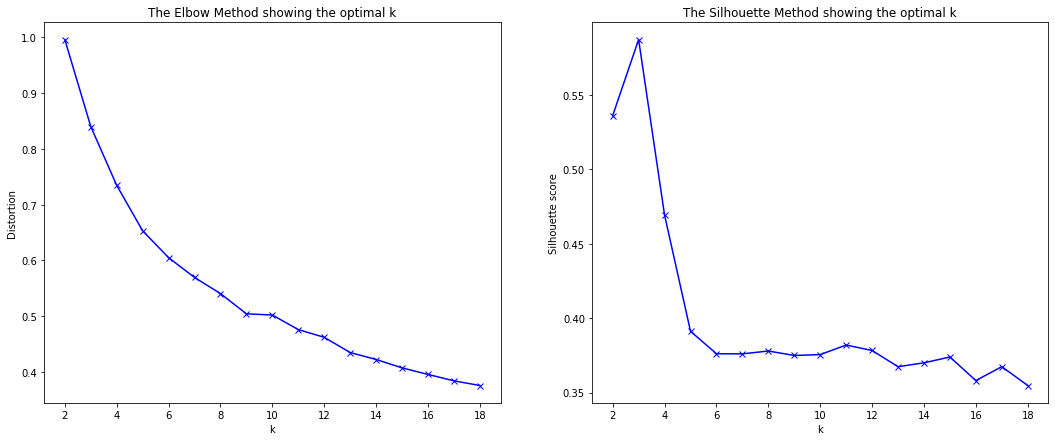

In [29]:
 # clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
silhouette_scores=[]
K = range(2,19)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train_pca)
    kmeanModel.fit(X_train_pca)
    labels = kmeanModel.labels_
    silhouette_score=metrics.silhouette_score(X_train_pca, labels, metric='euclidean')
    silhouette_scores.append(silhouette_score)
    print("silhouette %dth score:%f "%(k, silhouette_score))
    avg_sse=(sum(np.min(cdist(X_train_pca, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train_pca.shape[0])
    distortions.append(avg_sse)
    print("Distortion or average SSE for %dth cluster is:%f "%(k, avg_sse))


# Plot the elbow
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method showing the optimal k')
ax2.plot(K, silhouette_scores, 'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('Silhouette score')
ax2.set_title('The Silhouette Method showing the optimal k')
plt.show()


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5358934430918632
For n_clusters = 3 The average silhouette_score is : 0.5869348434538786
For n_clusters = 4 The average silhouette_score is : 0.46905548665887115
For n_clusters = 5 The average silhouette_score is : 0.39099641782817574
For n_clusters = 6 The average silhouette_score is : 0.3762932835447129
For n_clusters = 7 The average silhouette_score is : 0.37678125243459265
For n_clusters = 8 The average silhouette_score is : 0.37730022021381293
For n_clusters = 9 The average silhouette_score is : 0.3742814762637037
For n_clusters = 10 The average silhouette_score is : 0.37548881299638737
For n_clusters = 11 The average silhouette_score is : 0.3821789819857577
For n_clusters = 12 The average silhouette_score is : 0.3717910998147311
For n_clusters = 13 The average silhouette_score is : 0.3699044915773648
For n_clusters = 14 The average silhouette_score is : 0.370785

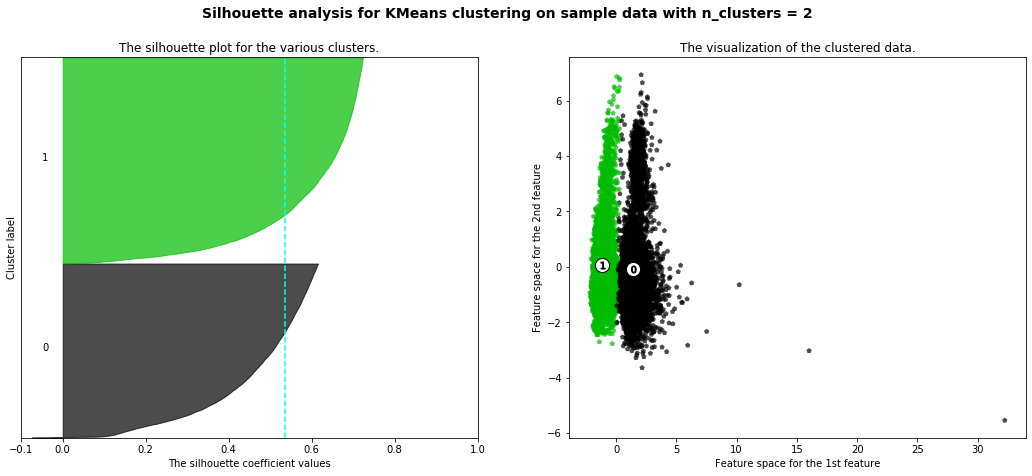

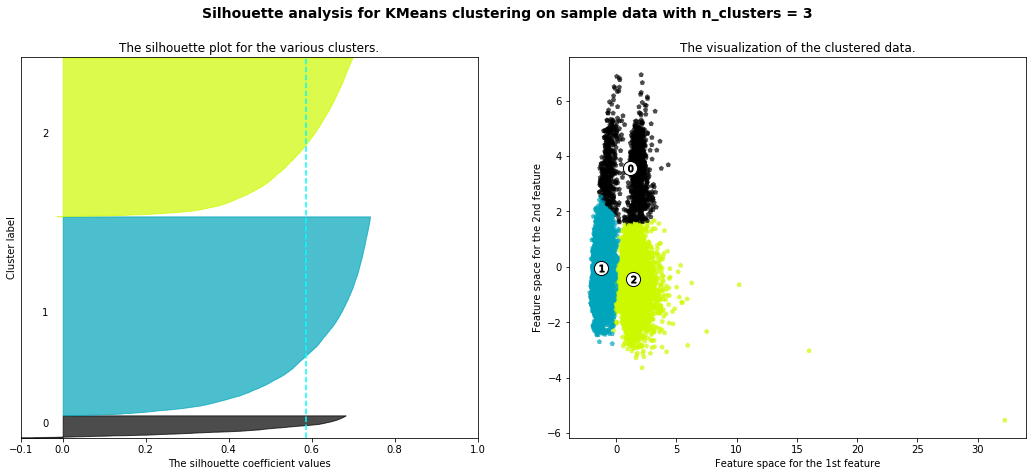

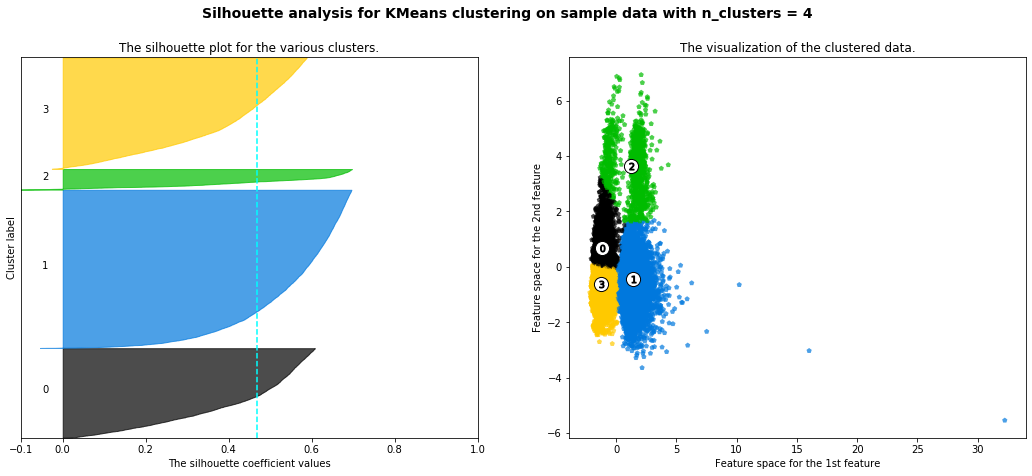

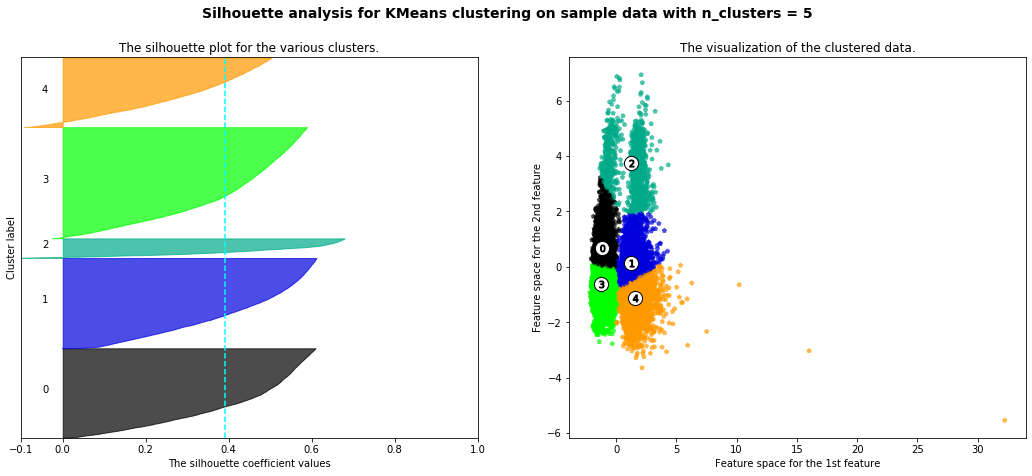

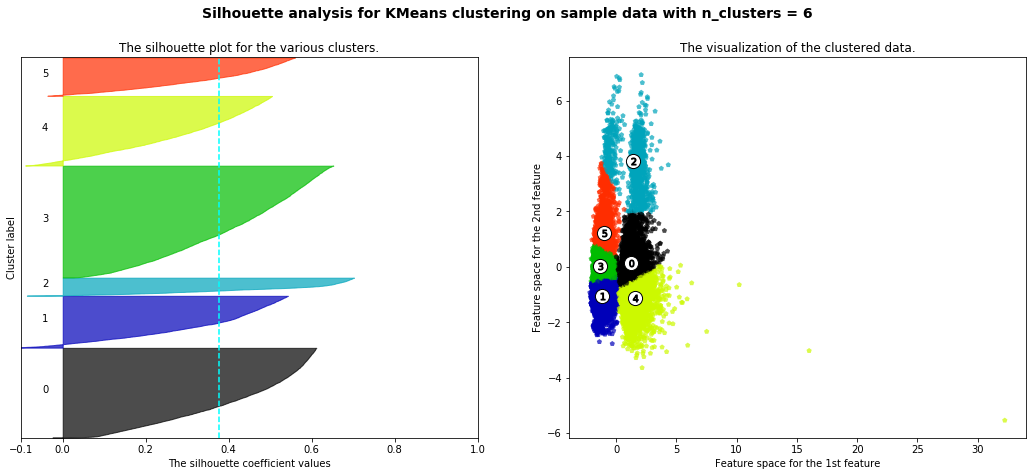

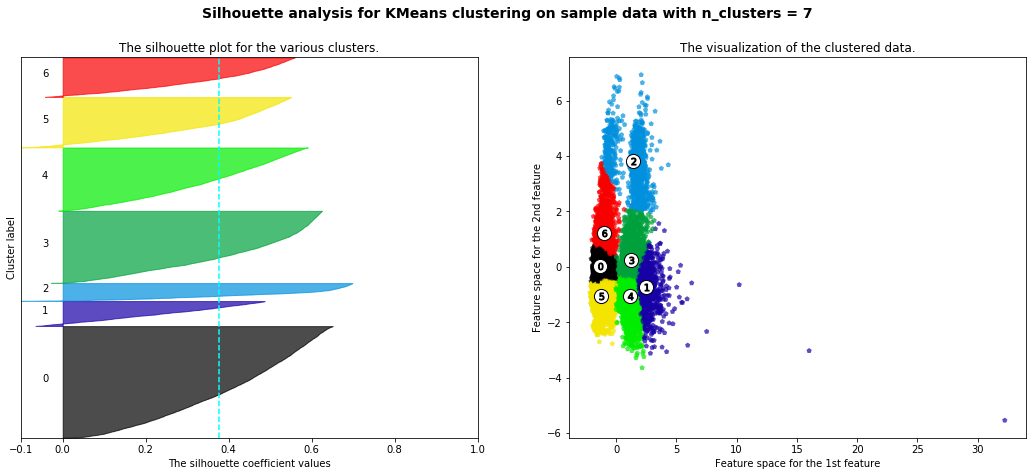

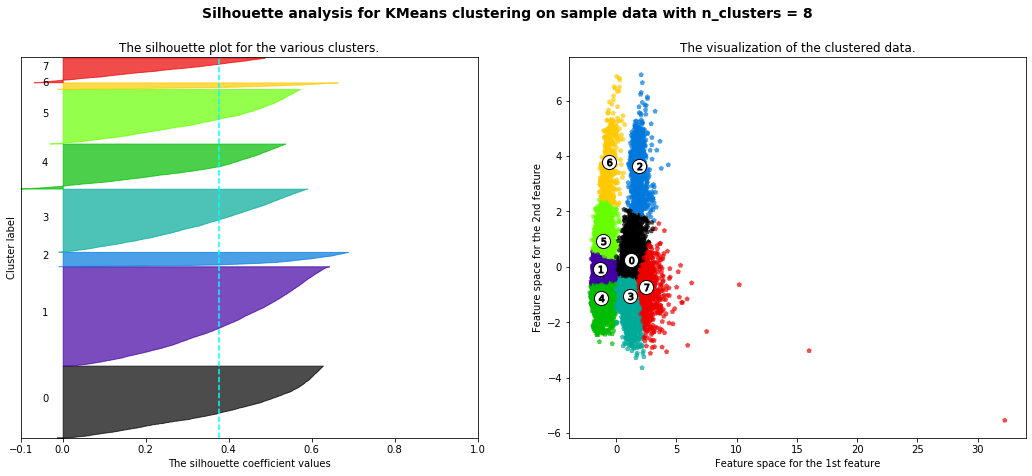

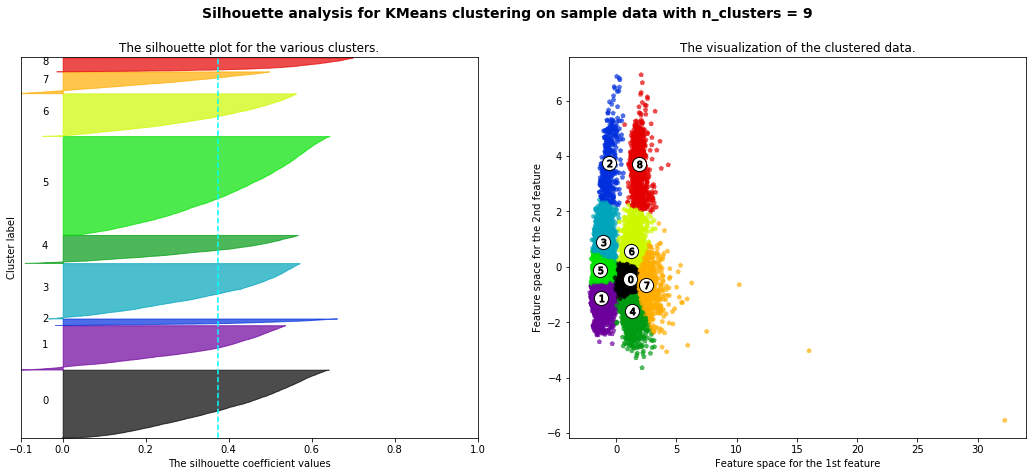

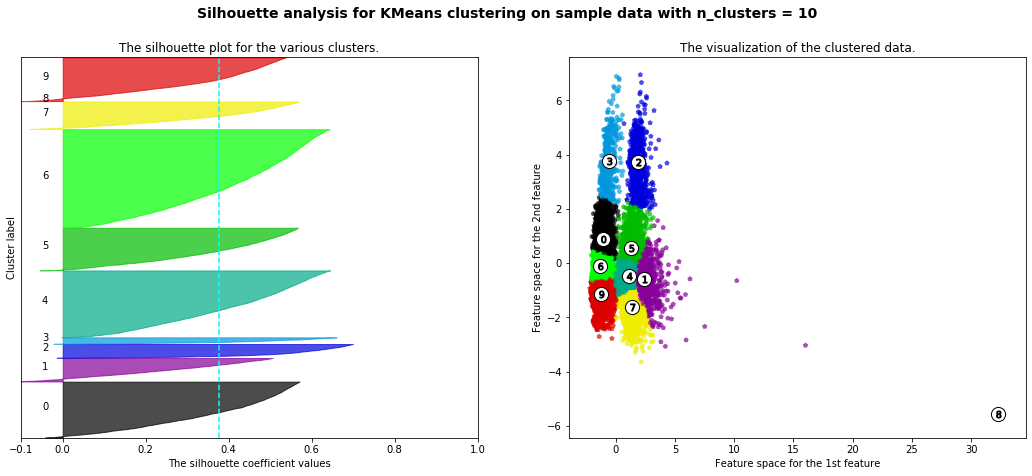

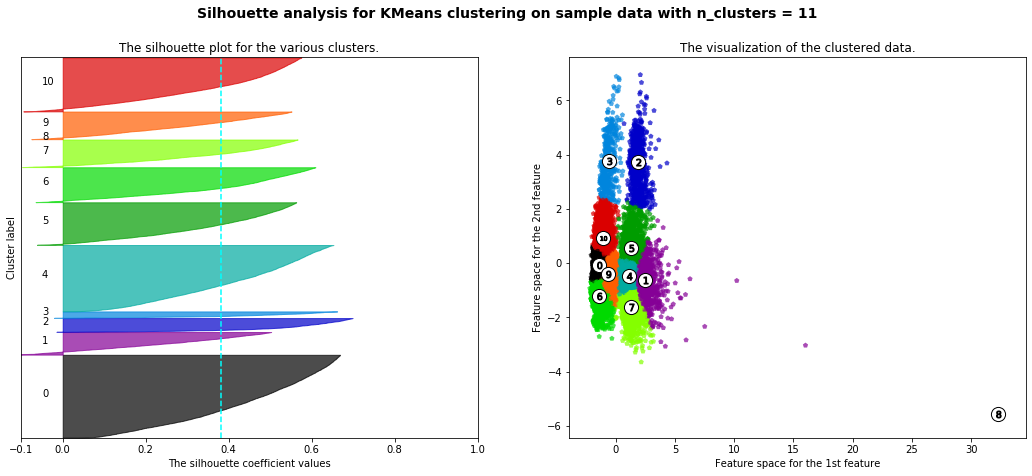

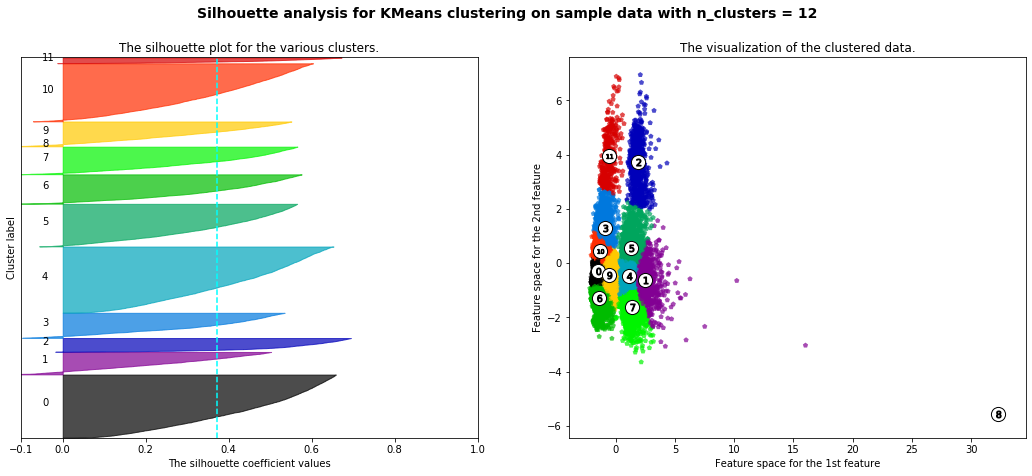

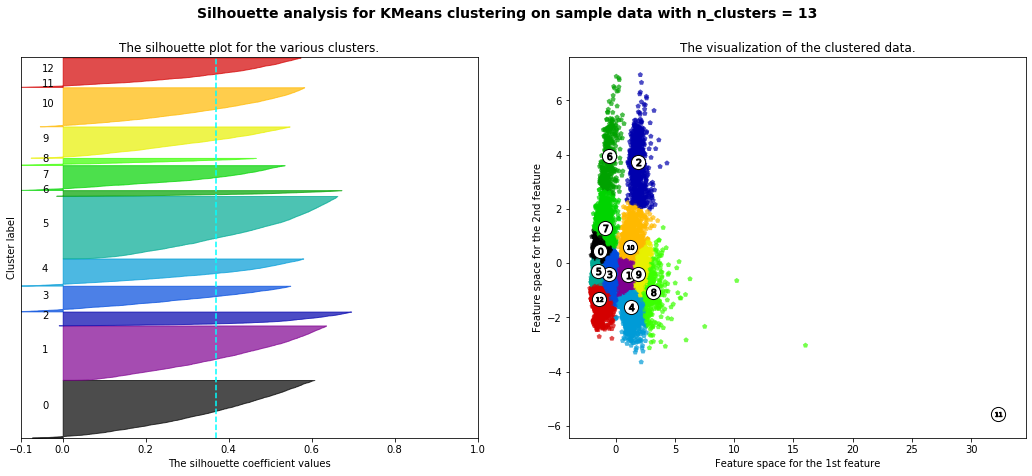

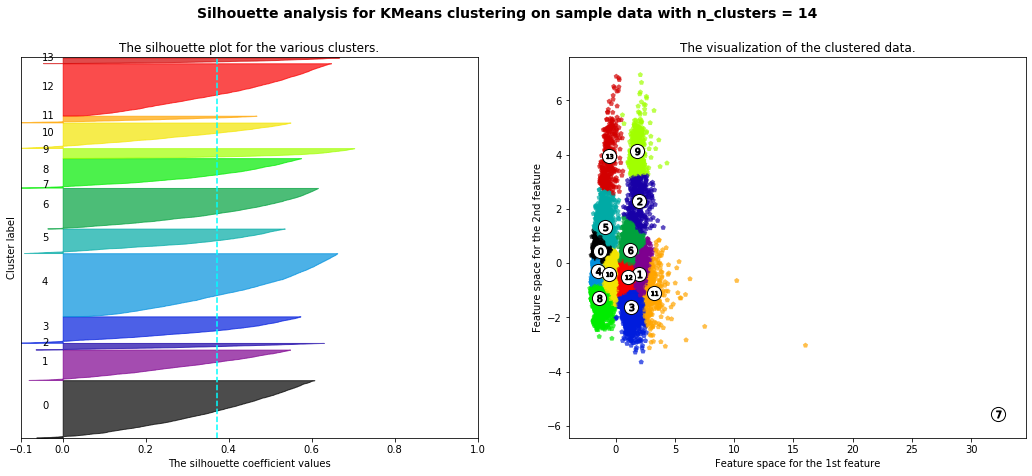

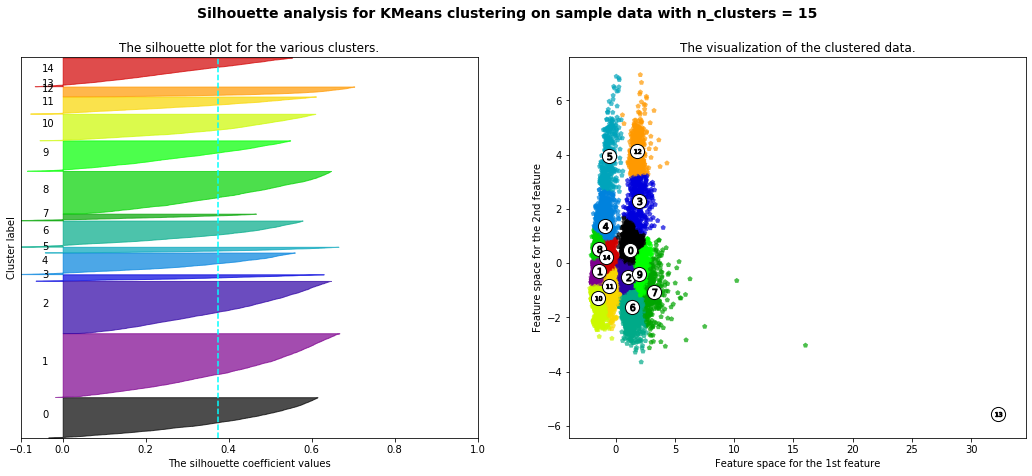

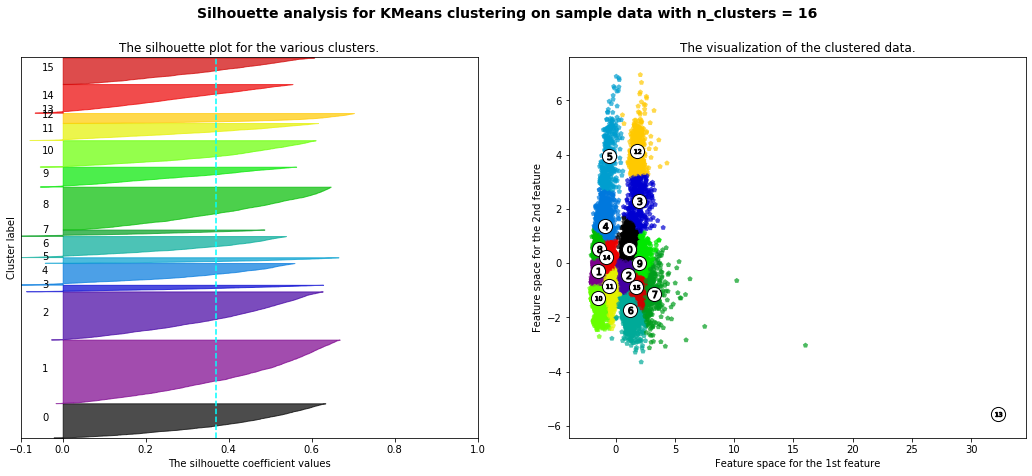

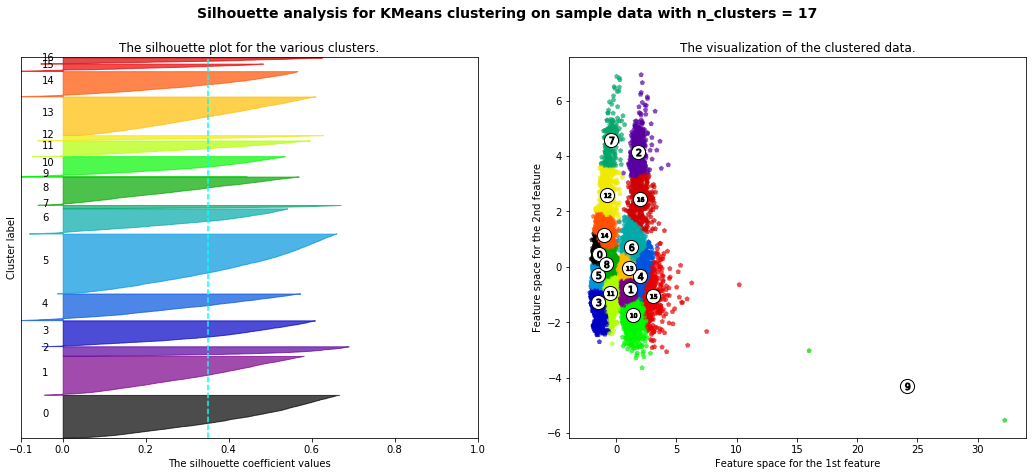

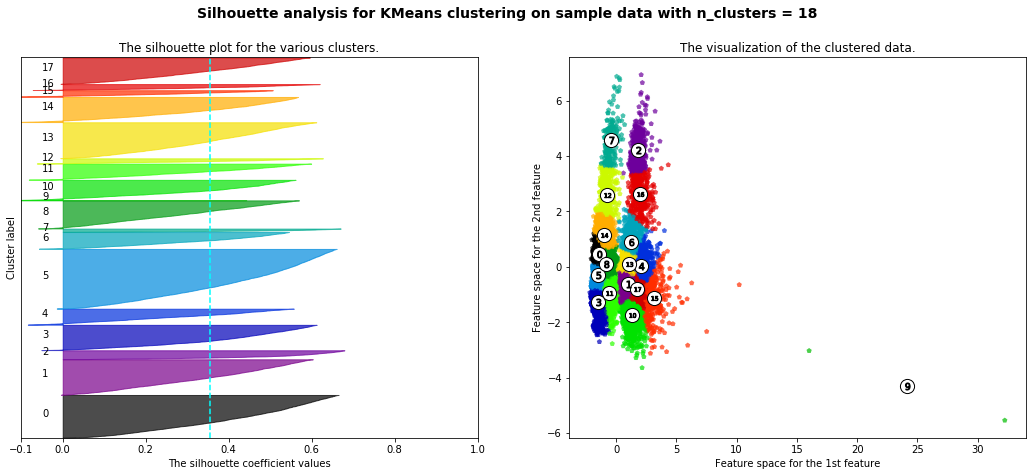

In [30]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
 

for n_clusters in range(2,19):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="cyan", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train_pca[:, 0], X_train_pca[:, 1], marker='p', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

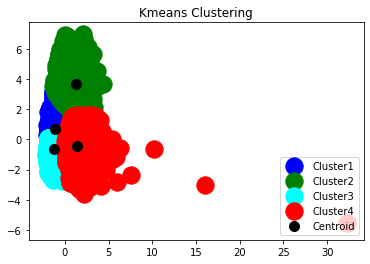

In [31]:


# Implementing the KMeans Algorithm with the optimal no.of Clusters
kmeans = KMeans(n_clusters =4, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train_pca)
cluster_data=data

cols=list(cluster_data.columns)



# Plotting the results
plt.scatter(X_train_pca[y_kmeans == 0, 0], X_train_pca[y_kmeans == 0, 1], s = 300, c = 'blue', label = 'Cluster1')
plt.scatter(X_train_pca[y_kmeans == 1, 0], X_train_pca[y_kmeans == 1, 1], s = 300, c = 'green', label = 'Cluster2')
plt.scatter(X_train_pca[y_kmeans == 2, 0], X_train_pca[y_kmeans == 2, 1], s = 300, c = 'cyan', label = 'Cluster3')
plt.scatter(X_train_pca[y_kmeans == 3, 0], X_train_pca[y_kmeans == 3, 1], s = 300, c = 'red', label = 'Cluster4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'Black', label = 'Centroid')
plt.title('Kmeans Clustering')
plt.legend(loc="lower right")
plt.show()

In [32]:
cluster_data["Cluster label"]=kmeans.labels_

#cluster_data["Centroid"]=kmeans.cluster_centers_
cluster_info = pd.DataFrame()

cluster_info=pd.DataFrame(columns=["Centroid","Cluster label","Min_cls1_cnt_clusterwise","Maj_cls0_cnt_clusterwise"])

for i in cluster_data["Cluster label"].unique():
    count1=np.sum(cluster_data[(cluster_data['deaths']==1) & (cluster_data["Cluster label"]==i)].count().unique())
    count0=np.sum(cluster_data[(cluster_data['deaths']==0) & (cluster_data["Cluster label"]==i)].count().unique())
    center=kmeans.cluster_centers_[i]
    cluster_info = cluster_info.append(pd.Series(data={'Centroid':center,'Cluster label':i, 'Min_cls1_cnt_clusterwise':count1, 'Maj_cls0_cnt_clusterwise':count0}), ignore_index=True)


cluster_info

,Centroid,Cluster label,Min_cls1_cnt_clusterwise,Maj_cls0_cnt_clusterwise
0,"[-1.159037496192126, 0.6763585033772073]",0,514,4616
1,"[-1.288322829110652, -0.6107833701172465]",2,756,5569
2,"[1.2508286817557799, 3.6485472043553457]",1,190,989
3,"[1.3991170514929305, -0.4329908177961689]",3,772,8248


In [35]:
#Assign x from the unseen fold to its closest cluster and If this cluster has only instances of one class, assign to x that label

#If cluster has only one instance of class then label will be that class itself
cluster_info['new_label']=np.where(cluster_info['Maj_cls0_cnt_clusterwise']>cluster_info['Min_cls1_cnt_clusterwise'],0,1)

#Copying cluster_info to cluster_info_new and adding 'New_label' column with modified labels

cluster_info_new=cluster_info
n_clusters=4
#X_test_labels contain assignment of labels on base of elucdian distance from centroids
X_test_labels=np.zeros(X_test_pca.shape[0])
for i in range(len(X_test_pca)):
  min_dis=10000
  for j in range(n_clusters-2):
    if np.linalg.norm(X_test_pca[i]-kmeans.cluster_centers_[j])<min_dis:
      min_dis=np.linalg.norm(X_test_pca[i]-kmeans.cluster_centers_[j])
      X_test_labels[i]=cluster_info_new['new_label'][j]

curr_bin["Cluster lable"]=X_test_labels
curr_bin["Cluster lable"] = curr_bin["Cluster lable"].astype(int)



In [38]:
#Second method to find out cluster label of left out fold
def cluster_2_label(alpha):
    if alpha == 0:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 1:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 2:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 3:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 4:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 5:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 6:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 7:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])

predict=kmeans.fit_predict(X_test_pca)
labels_2 = predict
curr_bin['cluster_label']=labels_2
curr_bin['class_label']=curr_bin['cluster_label'].apply(cluster_2_label)

print(predict)
#curr_bin = curr_bin.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
print(pd.crosstab(curr_bin['deaths'],curr_bin['class_label']))
print("Accuracy of defining class label: " ,acc(curr_bin['class_label'],curr_bin['deaths']))
#curr_bin

[2 2 2 ... 1 1 1]
class_label     0
deaths           
0            2158
1             248
Accuracy of defining class label:  0.8969243557772236


Scores for stratified Decision Tree are:
[0.8956774729842062, 0.8952618453865336, 0.8940149625935162, 0.8969243557772236, 0.8969243557772236, 0.8960931005818786, 0.8956774729842062, 0.8960931005818786, 0.8952618453865336, 0.8952618453865336]
Scores for stratified Random Forest Tree are:
[0.8935993349958438, 0.8935993349958438, 0.8935993349958438, 0.8935993349958438, 0.8935993349958438, 0.8935993349958438, 0.8935993349958438, 0.8935993349958438, 0.8935993349958438, 0.8935993349958438]
Average Accuracy for Decision Tree: 0.90 +/- 0.00
AverageAccuracy for RF Tree: 0.89 +/- 0.00
classification_report for Decision Tree is:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      2158
           1       0.00      0.00      0.00       248

    accuracy                           0.90      2406
   macro avg       0.45      0.50      0.47      2406
weighted avg       0.80      0.90      0.85      2406

classification_report for Random Forest Tree is

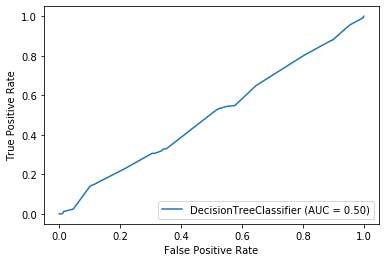

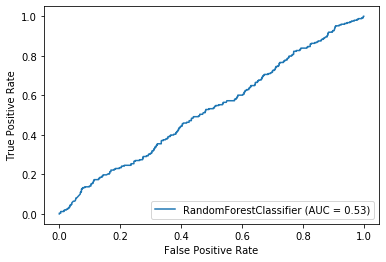

In [39]:
#DT and RF model with 10 bin
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score as acc
from sklearn.decomposition import PCA



rf_clf =RandomForestClassifier(n_estimators=1000,max_depth=8,criterion='entropy', min_samples_split=20,
                                random_state=10)
dt_clf=DecisionTreeClassifier(min_samples_split=20,max_depth=8,
                                random_state=10)
new_rf_score=[]
new_dt_score=[]

init0=0
init1=0

for i in range(10):
    curr_bin=pd.concat([df_class0.iloc[init0:init0+ln0,:],df_class1.iloc[init1:init1+ln1,:]])
    curr_bin=pd.DataFrame(curr_bin)


#Scaling and PCA for current bin
    X_test_bin=curr_bin.iloc[:,1:len(curr_bin.columns)-2]
    X_test_bin=sc.fit_transform(X_test_bin)
    X_test_bin_pca= pca.fit_transform(X_test_bin)
    X_train_bin=X.iloc[i:-1]
    X_train=sc.fit_transform(X_train_bin)
    X_train_pca= pca.fit_transform(X_train_bin)
    X_test_bin=sc.fit_transform(X_test_bin)
    y_train=y.iloc[i:-1]
    y_test_bin=curr_bin.iloc[:,len(curr_bin.columns)-2:len(curr_bin.columns)-1]

#Fitting both model for current bin    
    dt_clf.fit(X_train_pca,y_train.values.ravel())
    rf_clf.fit(X_train_pca,y_train.values.ravel())

#predicting for testing
    yrf_pred=rf_clf.predict(X_test_bin_pca)
    ydt_pred=dt_clf.predict(X_test_bin_pca)
    y_true=y_test_bin
    new_dt_score.append(acc(y_true,ydt_pred))
    new_rf_score.append(acc(y_true,yrf_pred)) 

print("Scores for stratified Decision Tree are:")
print(new_dt_score)
print("Scores for stratified Random Forest Tree are:")
print(new_rf_score)

print("Average Accuracy for Decision Tree: %0.2f +/- %0.2f" % (mean(new_dt_score), np.std(new_dt_score)))
print("AverageAccuracy for RF Tree: %0.2f +/- %0.2f" % (mean(new_rf_score), np.std(new_rf_score)))


#Result
print("classification_report for Decision Tree is:")

print(classification_report(y_true, ydt_pred))

print("classification_report for Random Forest Tree is:")

print(classification_report(y_true, yrf_pred))

plot_roc_curve(dt_clf, X_test_bin_pca, y_test_bin.values.ravel())
plt.show()

plot_roc_curve(rf_clf,X_test_bin_pca, y_test_bin.values.ravel())
plt.show()


In [40]:
##Permutation on results and Accuracies metrics
#Decision Tree results:
print("Baseline Decision Tree method accuries:")
print(old_dt_scores['test_score'])

print("\n Baseline Decision Tree method accuries mean:")
print(mean(old_dt_scores['test_score']))

print("\n New method Decision Tree accuries:")
print(new_dt_score) 

print("\n New method Decision Tree accuries mean:")
print(mean(new_dt_score)) 

tobs=mean(new_dt_score)-mean(old_dt_scores['test_score'])

dt_concat = np.concatenate((old_dt_scores['test_score'],new_dt_score))

count=0
for i in range(2000):
  perm = np.random.permutation(dt_concat)
  pcurr = perm[:len(old_dt_scores['test_score'])]
  pnew = perm[:len(new_dt_score)]
  percfltmean=np.mean(pcurr)
  pernfltmean=np.mean(pnew)
  tperm=pernfltmean-percfltmean
  if tperm>tobs:
    count=count+1
p=count/2000
print("Decision Tree p-value :",p)



#Random Forest Tree results:
print("Baseline Random Forest Tree method accuries:")
print(old_rf_scores['test_score'])

print("\n Baseline Random Forest Tree method accuries mean:")
print(mean(old_rf_scores['test_score']))

print("\n New method Random Forest Tree accuries:")
print(new_rf_score)


print("\n New method Random Forest Tree accuries mean:")
print(mean(new_rf_score)) 

tobs=mean(new_rf_score)-mean(old_rf_scores['test_score'])

rf_concat = np.concatenate((old_rf_scores['test_score'],new_rf_score))

count=0
for i in range(2000):
  perm = np.random.permutation(rf_concat)
  pcurr = perm[:len(old_rf_scores['test_score'])]
  pnew = perm[:len(new_rf_score)]
  percfltmean=np.mean(pcurr)
  pernfltmean=np.mean(pnew)
  tperm=pernfltmean-percfltmean
  if tperm>tobs:
    count=count+1
p=count/2000
print("Random Forest Tree p-value :",p)


Baseline Decision Tree method accuries:
[0.90041494 0.91701245 0.9253112  0.91078838 0.91268191 0.92931393
 0.89189189 0.92099792 0.92307692 0.91891892]

 Baseline Decision Tree method accuries mean:
0.9150408467835853

 New method Decision Tree accuries:
[0.8956774729842062, 0.8952618453865336, 0.8940149625935162, 0.8969243557772236, 0.8969243557772236, 0.8960931005818786, 0.8956774729842062, 0.8960931005818786, 0.8952618453865336, 0.8952618453865336]

 New method Decision Tree accuries mean:
0.8957190357439734
Decision Tree p-value : 1.0
Baseline Random Forest Tree method accuries:
[0.89419087 0.89419087 0.89419087 0.89419087 0.8960499  0.8960499
 0.8960499  0.8960499  0.8960499  0.89397089]

 Baseline Random Forest Tree method accuries mean:
0.8950983859697553

 New method Random Forest Tree accuries:
[0.8935993349958438, 0.8935993349958438, 0.8935993349958438, 0.8935993349958438, 0.8935993349958438, 0.8935993349958438, 0.8935993349958438, 0.8935993349958438, 0.8935993349958438, 0.8

In [ ]:
#Creating Boxplots for varibles

sns.boxplot(data= new_dt_score).set(title = 'new_dt_score', xlabel = 'new_dt_score', ylabel = 'Accuracy' )

In [ ]:
sns.boxplot(data= new_rf_score,dodge=True,fliersize=10).set(title = 'new_rf_score', xlabel = 'new_rf_score', ylabel = 'Accuracy' )

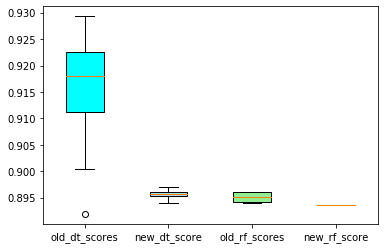

In [41]:
# BOXPLOTS COMPARISON

import matplotlib.pyplot as plt


box_plot_data=[old_dt_scores['test_score'],new_dt_score,old_rf_scores['test_score'],new_rf_score]
box=plt.boxplot(box_plot_data,vert=1,patch_artist=True,labels=['old_dt_scores','new_dt_score','old_rf_scores','new_rf_score'],
            )
 
colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()